#### Figure 4

##### Package imports, figure settings, color definitions
<img src="color_pal.png" width="500">

/Users/mlanghinrichs/Documents/Studium/MSc/09_hiwi_hoefer/01_project/memo_py/memo_py/selection.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


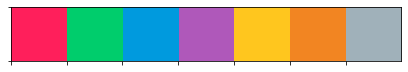

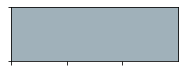

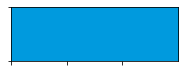

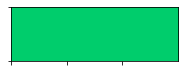

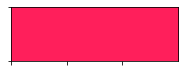

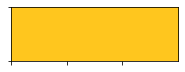

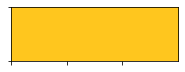

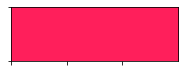

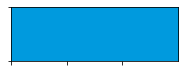

In [2]:
%matplotlib inline
%run settings_load.py

##### Network scheme

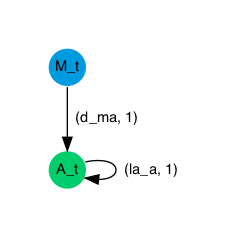

In [24]:
res = pickle.load(open('estimation_count_data_cd44_filtered_sigma022_minimal2.pickle', 'rb'))
net = res[0].net

# need hex colors here
# "#FF1F5B", "#00CD6C", "#009ADE"
node_settings = {
    'M_t': {'label': 'M_t', 'color': "#009ADE"}, # "#FFC61E", "#009ADE"
    'A_t': {'label': 'A_t', 'color': "#00CD6C"}
}
me.plots.net_main_plot(net, node_settings=node_settings, save='paper_figures/model_scheme_cd44.pdf')
# me.plots.net_hidden_plot(net, layout='dot')

##### Cell number histograms

In [7]:
data = pickle.load(open('count_data_cd44_manual_counting_18_01_14_filtered_sigma022.pickle', 'rb'))

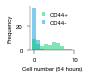

In [7]:
plt.rcParams.update({'figure.figsize': (0.8, 0.8)})
time_index = -1 # last time point
settings = {
    'M_t': {'label': 'CD44-', 'color': cnaive, 'opacity': 0.5},
    'A_t': {'label': 'CD44+', 'color': cactiv, 'opacity': 0.5}
    }
me.plots.data_hist_variables_plot(data, time_index, normalised=False, settings=settings,
                                  x_label='Cell number (54 hours)', save='paper_figures/data_cd44_count_hist.pdf')

In [8]:
# best phase-type model
res1 = pickle.load(open('estimation_count_data_cd44_filtered_sigma022_par3.pickle', 'rb'))
res2 = pickle.load(open('estimation_count_data_cd44_filtered_sigma022_minimal2.pickle', 'rb'))

# res = pickle.load(open('estimation_count_data_cd44_filtered_thin4_par3.pickle', 'rb'))

res = res1 + res2
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)

In [49]:
res[0].net.net_rates_identifier

{'theta_0': 'alpha_F',
 'theta_1': 'alpha_S',
 'theta_2': 'alpha_T',
 'theta_3': 'lambda'}

In [50]:
# best model
est_i = list(model_probs).index(max(model_probs))
print(est_i, net_names[est_i])

# 9th best model
sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
est_i = net_names.index(net_names_sorted[8])
print(est_i, net_names[est_i])

# 5th best model
sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
est_i = net_names.index(net_names_sorted[4])
print(est_i, net_names[est_i])

348 net_alphaF6_alphaS6_alphaT6_lambda14
397 net_alphaF6_alphaS8_alphaT14_lambda14
475 net_alphaF8_alphaS8_alphaT18_lambda18


In [43]:
est = res[59]
print(est.net.net_name)

net_3_20


In [24]:
num_iter = 1000 # 10000
theta_rand = np.random.choice(est.bay_est_samples_weighted.shape[0], num_iter)
time_values = est.data.data_time_values
initial_values = {'N_t': 1, 'A_t': 0, 'P1_t': 0, 'P2_t': 0, 'P3_t': 0}
variables = {'M_t': ('N_t', 'P1_t', 'P2_t', 'P3_t'), 'A_t': ('A_t', )}

sim = me.Simulation(est.net)
res_list = list()

In [25]:
for i in range(num_iter):
    a1, a2, a3, l = est.bay_est_samples_weighted[theta_rand[i], :]
    theta_values = {'alpha_F': a1, 'alpha_S': a2, 
                    'alpha_T': a3, 'lambda': l}
    
    res_list.append(sim.simulate('gillespie', initial_values, theta_values, time_values, variables)[1])

in_silico_counts = np.array(res_list)

In [26]:
data = me.Data('data_best_phase_model')
data.load(['A_t', 'M_t'], time_values, in_silico_counts, bootstrap_samples=1000, basic_sigma=1.0/num_iter)

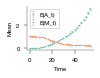

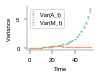

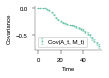

In [36]:
plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
me.plots.data_mean_plot(data, save='paper_figures/data_in_sil_5thbestPH_mean.pdf')
me.plots.data_variance_plot(data, save='paper_figures/data_in_sil_5thbestPH_var.pdf')
me.plots.data_covariance_plot(data, save='paper_figures/data_in_sil_5thbestPH_cov.pdf')

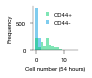

In [27]:
plt.rcParams.update({'figure.figsize': (0.8, 0.8)})
time_index = -1 # last time point
settings = {
    'M_t': {'label': 'CD44-', 'color': cnaive, 'opacity': 0.5},
    'A_t': {'label': 'CD44+', 'color': cactiv, 'opacity': 0.5}
    }
me.plots.data_hist_variables_plot(data, time_index, normalised=False, settings=settings,
                                  x_label='Cell number (54 hours)', 
                                  save='paper_figures/data_cd44_count_hist_5thPHmodel.pdf')

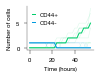

In [32]:
plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

trace_emph = 0
for trace_i in range(10): # data.data_counts.shape[0]):
    if trace_i!=trace_emph:
        plt.plot(data.data_time_values, data.data_counts[trace_i, 0, :], color=cactiv, alpha=0.15, linewidth=0.5)
        plt.plot(data.data_time_values, data.data_counts[trace_i, 1, :], color=cnaive, alpha=0.15, linewidth=0.5)
    else:
        plt.plot(data.data_time_values, data.data_counts[trace_i, 0, :], color=cactiv, alpha=1.0, linewidth=1.0, label='CD44+', zorder=1000) # color='darkgreen'
        plt.plot(data.data_time_values, data.data_counts[trace_i, 1, :], color=cnaive, alpha=1.0, linewidth=1.0, label='CD44-', zorder=1000) # color='darkblue'
        
# ax.set_ylim([-0.3, None])
leg = plt.legend()
plt.legend(frameon=False)
# leg.get_frame().set_edgecolor('lightgrey')
plt.xlabel('Time (hours)')
plt.ylabel('Number of cells')
plt.savefig(f'paper_figures/data_cd44_swtraces_5thbestPH.pdf', bbox_inches='tight')

In [4]:
res1 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_minimal2.pickle', 'rb'))
res2 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par2.pickle', 'rb'))
res3 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par3_new.pickle', 'rb'))
res = res1 + res2 + res3
print(len(res1), len(res2), len(res3), len(res))

net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
data = res[0].data
print(sum(['alphaF' in name for name in net_names]))

100 288 588 976
0


In [5]:
# set model prior to give classes same weight
mprior = np.array([0.25] + [0.25/99]*99 + [0.25/288]*288 + [0.25/588]*588)
print(sum(mprior))
print(len(mprior))

1.000000000000017
976


In [23]:
# res = [est]
celltype = 1 # 0 or 1 (active, naive)
time_point = -1 # last time point
sample_n = 1000 # 1000 # posterior samples of cell histograms; typically 1000-10000
sim_n = 500 # 500 # simulation repeats per given model and theta; ideally, inf
count_max = 16
y = hist_cell_counts_samples(res, celltype, time_point, sample_n, count_max, sim_n, mprior)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [63]:
print(y.shape)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)

(16, 1000)


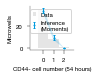

In [65]:
# compute model histogram over all models
# naive_y = y.copy()
plt.rcParams.update({'figure.figsize': (0.8, 0.8)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

linelow = 44*y_95_lower/sim_n
line = 44*y_median/sim_n
lineupp = 44*y_95_upper/sim_n
errlow = line-linelow
errupp = lineupp-line

plt.fill_between(range(count_max), linelow, line, color=cnaive, alpha=0.2, linewidth=0.0, zorder=100)
# plt.plot(range(count_max), line, color=cnaive, zorder=200, linewidth=1.0)
plt.fill_between(range(count_max), line, lineupp, color=cnaive, alpha=0.2, linewidth=0.0, zorder=100) #,
#                 label='Models')
cutplot = 3
plt.errorbar(list(range(count_max))[:cutplot], line[:cutplot], yerr=np.array([errlow, errupp])[:, :cutplot],
            color=cnaive, linewidth=1.0, capsize=1.0,
             zorder=100, markersize=2, fmt='.', label='Inference\n(Moments)')

plt.hist(res[0].data.data_counts[:, 1, -1], bins=np.linspace(-0.5, 9.5, num=11), 
         color='black', alpha=0.1, label='Data')
plt.xticks([0, 1, 2])
plt.xlim(None, 3)
plt.ylim(-1.5, None)
plt.xlabel('CD44- cell number (54 hours)')
plt.ylabel('Microwells')
plt.legend()
plt.savefig(f'paper_figures/hist_cd44_naive_bands.pdf', bbox_inches='tight') # _thin4

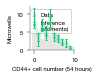

In [57]:
# compute model histogram over all models
# active_y = y.copy()
plt.rcParams.update({'figure.figsize': (0.8, 0.8)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

linelow = 44*y_95_lower/sim_n
line = 44*y_median/sim_n
lineupp = 44*y_95_upper/sim_n
errlow = line-linelow
errupp = lineupp-line

plt.fill_between(range(count_max), linelow, line, color=cactiv, alpha=0.2, linewidth=0.0, zorder=100)
# plt.plot(range(count_max), line, color=cactiv, zorder=200, linewidth=1.0)
plt.fill_between(range(count_max), line, lineupp, color=cactiv, alpha=0.2, linewidth=0.0, zorder=100) #,
#                 label='Model')

cutplot = 10
plt.errorbar(list(range(count_max))[:cutplot], line[:cutplot], 
             yerr=np.array([errlow, errupp])[:, :cutplot],
            color=cactiv, linewidth=1.0, capsize=1.0,
             zorder=100, markersize=2, fmt='.', label='Inference\n(Moments)')

plt.hist(res[0].data.data_counts[:, 0, -1], bins=np.linspace(-0.5, 9.5, num=11), 
         color='black', alpha=0.1, label='Data')

plt.xlim(-1, 10)
plt.xlabel('CD44+ cell number (54 hours)')
plt.ylabel('Microwells')
plt.legend()
plt.savefig(f'paper_figures/hist_cd44_active_band.pdf', bbox_inches='tight') # _thin4

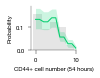

In [21]:
def bin_counts(arr):
    # 1d input array with even length
    # create with same length
    arr_binned = np.zeros((arr.shape[0]))
    
    # loop over every second element
    for i in range(int(arr_binned.shape[0]/2)):
        bin_val = (arr[2*i] + arr[2*i+1])/2.0
        arr_binned[2*i] = bin_val
        arr_binned[2*i+1] = bin_val
    return arr_binned

y_95_lower_binned = bin_counts(y_95_lower)
y_median_binned = bin_counts(y_median)
y_95_upper_binned = bin_counts(y_95_upper)

# compute model histogram over all models
plt.rcParams.update({'figure.figsize': (0.8, 0.8)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.fill_between(range(count_max), y_95_lower_binned/sim_n, y_median_binned/sim_n, color=cactiv, alpha=0.2, linewidth=0.0, zorder=100)
plt.plot(range(count_max), y_median_binned/sim_n, color=cactiv, zorder=200, linewidth=1.0)
plt.fill_between(range(count_max), y_median_binned/sim_n, y_95_upper_binned/sim_n, color=cactiv, alpha=0.2, linewidth=0.0, zorder=100)

# plt.plot(range(count_max), 44*y_95_upper/sim_n, color=cactiv, zorder=100, alpha=0.5)
# plt.plot(range(count_max), 44*y_95_lower/sim_n, color=cactiv, zorder=100, alpha=0.5)

plt.hist(data.data_counts[:, 0, -1], bins=np.linspace(-0.5, 9.5, num=6), color='black', alpha=0.1, density=True)
plt.xlim(-1, 10)
plt.xlabel('CD44+ cell number (54 hours)')
plt.ylabel('Probability')
plt.savefig(f'paper_figures/hist_cd44_active_2bin.pdf', bbox_inches='tight')

In [62]:
# save naive_y and active_y for replotting
# with open('waiting_times_files/inf_cell_counts_minimal2_par2_par3_sigma022_naive_y.pickle', 'wb') as file_: # in_silico_estimation
#     pickle.dump(naive_y, file_)
# with open('waiting_times_files/inf_cell_counts_minimal2_par2_par3_sigma022_active_y.pickle', 'wb') as file_: # in_silico_estimation
#     pickle.dump(active_y, file_)

# load from these files to use as 'y' for above plots
# inf_cell_counts_minimal2_par2_par3_sigma022_naive_y
# inf_cell_counts_minimal2_par2_par3_sigma022_active_y
y = pickle.load(open('waiting_times_files/inf_cell_counts_minimal2_par2_par3_sigma022_naive_y.pickle', 'rb'))

##### Event analysis

In [33]:
data = pickle.load(open('waiting_times_files/count_data_cd44_manual_counting_18_01_14_filtered_sigma022.pickle', 'rb'))

In [34]:
data.events_find_all()

In [35]:
print(event_percentage(data.event_all_first_change_from_inital_conditions))
print(event_percentage(data.event_all_first_cell_type_conversion))
print(event_percentage(data.event_all_first_cell_count_increase))
print(event_percentage(data.event_all_first_cell_count_increase_after_cell_type_conversion))
print(event_percentage(data.event_all_second_cell_count_increase_after_first_cell_count_increase_after_cell_type_conversion))
print(event_percentage(data.event_all_third_cell_count_increase_after_first_and_second_cell_count_increase_after_cell_type_conversion))

84.0909090909091
81.81818181818181
70.45454545454545
68.18181818181819
61.36363636363637
45.45454545454545


In [36]:
# events of the data
e_act_data = event_percentage(data.event_all_first_cell_type_conversion)
e_div1_data = event_percentage(data.event_all_first_cell_count_increase_after_cell_type_conversion)
e_div2_data = event_percentage(data.event_all_second_cell_count_increase_after_first_cell_count_increase_after_cell_type_conversion)
e_div3_data = event_percentage(data.event_all_third_cell_count_increase_after_first_and_second_cell_count_increase_after_cell_type_conversion)

In [37]:
# bootstrapping of microwells to get 95% uncertainty intervals for data events
nwells = data.data_counts.shape[0]
inds = np.array(range(0, nwells))
nsamples = 5000

e_act_data_samples = np.zeros(nsamples)
e_div1_data_samples = np.zeros(nsamples)
e_div2_data_samples = np.zeros(nsamples)
e_div3_data_samples = np.zeros(nsamples)

variables = data.data_variables
time_values = data.data_time_values

for i in range(nsamples):
    wellinds = np.random.choice(inds, replace=True, size=nwells)
    data_counts_sample = np.copy(data.data_counts[wellinds, :, :])
    
    data_btstrp = me.Data('data_btstrp')
    data_btstrp.load(variables, time_values, data_counts_sample, bootstrap_samples=2)
    data_btstrp.events_find_all()
    
    e_act_data_samples[i] = event_percentage(data_btstrp.event_all_first_cell_type_conversion)
    e_div1_data_samples[i] = event_percentage(data_btstrp.event_all_first_cell_count_increase_after_cell_type_conversion)
    e_div2_data_samples[i] = event_percentage(data_btstrp.event_all_second_cell_count_increase_after_first_cell_count_increase_after_cell_type_conversion)
    e_div3_data_samples[i] = event_percentage(data_btstrp.event_all_third_cell_count_increase_after_first_and_second_cell_count_increase_after_cell_type_conversion)
    
print(np.percentile(e_act_data_samples, 50.0), np.percentile(e_act_data_samples, 2.5), np.percentile(e_act_data_samples, 97.5))
print(np.percentile(e_div1_data_samples, 50.0), np.percentile(e_div1_data_samples, 2.5), np.percentile(e_div1_data_samples, 97.5))
print(np.percentile(e_div2_data_samples, 50.0), np.percentile(e_div2_data_samples, 2.5), np.percentile(e_div2_data_samples, 97.5))
print(np.percentile(e_div3_data_samples, 50.0), np.percentile(e_div3_data_samples, 2.5), np.percentile(e_div3_data_samples, 97.5))

81.81818181818181 70.45454545454545 93.18181818181819
68.18181818181819 54.54545454545455 81.81818181818181
61.36363636363637 47.72727272727273 75.0
45.45454545454545 31.818181818181817 59.09090909090909


In [38]:
res1 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_minimal2.pickle', 'rb'))
res2 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par2.pickle', 'rb'))
res3 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par3_new.pickle', 'rb'))
res = res1 + res2 + res3
print(len(res1), len(res2), len(res3), len(res))

net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
data = res[0].data
print(sum(['alphaF' in name for name in net_names]))

100 288 588 976
0


In [39]:
# set model prior to give classes same weight
mprior = np.array([0.25] + [0.25/99]*99 + [0.25/288]*288 + [0.25/588]*588)
print(sum(mprior))
print(len(mprior))

1.000000000000017
976


In [40]:
data.data_variables

['A_t', 'M_t']

In [44]:
# paper run should be like: res, 1000, 500, mprior
(e_act_model_samples, e_div1_model_samples,
    e_div2_model_samples, e_div3_model_samples) = event_model_samples(
                                            res, 1000, 500, mprior) # 1000, 500

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [52]:
# save these event files for later reusage
# with open('waiting_times_files/inf_events_minimal2_par2_par3_sigma022_act_div123_samples.pickle', 'wb') as file_: # in_silico_estimation
#     pickle.dump((e_act_model_samples, e_div1_model_samples,
#     e_div2_model_samples, e_div3_model_samples), file_)

# load them for replotting
(e_act_model_samples, e_div1_model_samples,
 e_div2_model_samples, e_div3_model_samples) = pickle.load(open('waiting_times_files/inf_events_minimal2_par2_par3_sigma022_act_div123_samples.pickle', 'rb'))

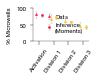

In [46]:
# plot copied from plot comment (fig_dots_w_mult_bars)
val_obj = np.array([
        np.array([[e_act_data, e_act_data - np.percentile(e_act_data_samples, 2.5), np.percentile(e_act_data_samples, 97.5) - e_act_data], 
                  [np.percentile(e_act_model_samples, 50.0), np.percentile(e_act_model_samples, 50.0) - np.percentile(e_act_model_samples, 2.5), np.percentile(e_act_model_samples, 97.5) - np.percentile(e_act_model_samples, 50.0)]]),
        np.array([[e_div1_data, e_div1_data - np.percentile(e_div1_data_samples, 2.5), np.percentile(e_div1_data_samples, 97.5) - e_div1_data], 
                  [np.percentile(e_div1_model_samples, 50.0), np.percentile(e_div1_model_samples, 50.0) - np.percentile(e_div1_model_samples, 2.5), np.percentile(e_div1_model_samples, 97.5) - np.percentile(e_div1_model_samples, 50.0)]]),
        np.array([[e_div2_data, e_div2_data - np.percentile(e_div2_data_samples, 2.5), np.percentile(e_div2_data_samples, 97.5) - e_div2_data], 
                  [np.percentile(e_div2_model_samples, 50.0), np.percentile(e_div2_model_samples, 50.0) - np.percentile(e_div2_model_samples, 2.5), np.percentile(e_div2_model_samples, 97.5) - np.percentile(e_div2_model_samples, 50.0)]]),
        np.array([[e_div3_data, e_div3_data - np.percentile(e_div3_data_samples, 2.5), np.percentile(e_div3_data_samples, 97.5) - e_div3_data], 
                  [np.percentile(e_div3_model_samples, 50.0), np.percentile(e_div3_model_samples, 50.0) - np.percentile(e_div3_model_samples, 2.5), np.percentile(e_div3_model_samples, 97.5) - np.percentile(e_div3_model_samples, 50.0)]])
        ], dtype=object)

attributes = {0: ('Activation', [cwact, cwact]),
              1: ('Division 1', [cwdiv, cwdiv]),
              2: ('Division 2', [cwdiv, cwdiv]),
              3: ('Division 3', [cwdiv, cwdiv])}

legend_attr = [('blue', 'x'), ('limegreen', 'y'), ('red', 'z')]

# initialise figure and axis settings
plt.rcParams.update({'figure.figsize': (1.0, 0.6)})

plt.figure()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# actual plotting
for val_ind in range(val_obj.shape[0]):
    color_list = attributes[val_ind][1]
    dots_per_categ = val_obj[val_ind].shape[0]

    if dots_per_categ == 1:
        x_pos = [val_ind + 1]
    elif dots_per_categ == 2:
        x_pos = [val_ind + 1 - 0.2, val_ind + 1 + 0.2]
    elif dots_per_categ == 3:
        x_pos = [val_ind + 1 - 0.2, val_ind + 1, val_ind + 1 + 0.2]

    for dot_ind in range(dots_per_categ):
        plt.errorbar(x_pos[dot_ind], val_obj[val_ind][dot_ind, 0],
                    yerr=val_obj[val_ind][dot_ind, 1:].reshape(2,1),
                    fmt='^' if dot_ind==0 else 'o', capsize=1, elinewidth=0.7, markeredgewidth=0.7,
                    markersize=2, markeredgecolor=color_list[dot_ind],
                    color=color_list[dot_ind], ecolor='lightgrey', zorder=1000,
                    label=['Data', 'Inference\n(Moments)'][dot_ind] if val_ind==0 else None)

# add x axis ticks
plt.xticks([val_ind + 1 for val_ind in range(val_obj.shape[0])],
                [attributes[val_ind][0] for val_ind in range(val_obj.shape[0])], rotation=55)

# add legend manually
# plt.legend(handles=[mpatches.Patch(color=leg[0], label=leg[1]) for leg in legend_attr])
plt.legend(frameon=False, loc='upper right')

plt.ylim(0, 100) # ylim(35, 90)
plt.ylabel('% Microwells')
plt.savefig('paper_figures/event_analysis_full.pdf', bbox_inches='tight')

##### Model results

##### minimal model results (Markov+Erlang)

In [5]:
res = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_minimal2.pickle', 'rb'))

In [6]:
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
log_evids = [est.bay_est_log_evidence for est in res]

sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
log_evids_sorted = np.array(log_evids)[sort_inds]

print(model_probs_sorted[:10])
print(log_evids_sorted[:10])
print(net_names_sorted[:10])

[0.15104273 0.14571297 0.12672787 0.10650158 0.10627389 0.08805198
 0.06527255 0.0647611  0.0494027  0.03840488]
[208.71859475 208.68267069 208.54307402 208.3691918  208.3670516
 208.17895931 207.87960353 207.87173706 207.60103714 207.34921655]
['net_3_20' 'net_3_19' 'net_3_18' 'net_3_17' 'net_3_16' 'net_3_15'
 'net_3_13' 'net_3_14' 'net_3_12' 'net_3_11']


In [7]:
print(res[0].net.net_name, res[0].bay_est_log_evidence)

net_1_1 -238.65521727902052


In [35]:
# # looks all good (compare run with a newer memopy version)
# res_compare = pickle.load(open('estimation_count_data_cd44_filtered_sigma022_minimal2_multiedge.pickle', 'rb'))
# print([est.net.net_name for est in res] == [est.net.net_name for est in res_compare])
# print(np.all(np.array([est.data_mean_values for est in res]) == np.array([est.data_mean_values for est in res_compare])))
# print(np.all(np.array([est.data_var_values for est in res]) == np.array([est.data_var_values for est in res_compare])))
# print(np.all(np.array([est.data_cov_values for est in res]) == np.array([est.data_cov_values for est in res_compare])))
# print([est.bay_log_likelihood_norm for est in res] == [est.bay_log_likelihood_norm for est in res_compare])
# print([est.net_simulation.sim_moments.moment_eqs for est in res] == [est.net_simulation.sim_moments.moment_eqs for est in res_compare])
# print([est.net_simulation.sim_moments.moment_eqs_template_str for est in res] == [est.net_simulation.sim_moments.moment_eqs_template_str for est in res_compare])

# plt.figure()
# plt.scatter([est.bay_est_log_evidence for est in res], [est.bay_est_log_evidence for est in res_compare])

# print(stats.pearsonr([est.bay_est_log_evidence for est in res], [est.bay_est_log_evidence for est in res_compare]))
# print(stats.spearmanr([est.bay_est_log_evidence for est in res], [est.bay_est_log_evidence for est in res_compare]))

# plt.figure()
# plt.scatter([est.bay_est_log_likelihood_max for est in res], [est.bay_est_log_likelihood_max for est in res_compare])
# res[0].bay_est_log_likelihood_max
# print(stats.pearsonr([est.bay_est_log_likelihood_max for est in res], [est.bay_est_log_likelihood_max for est in res_compare]))
# print(stats.spearmanr([est.bay_est_log_likelihood_max for est in res], [est.bay_est_log_likelihood_max for est in res_compare]))

# for est1, est2 in zip(res, res_compare):
# #     print(est1.net.net_name, est1.bay_est_log_evidence, est2.bay_est_log_evidence)
#     print(est1.net.net_name, est1.bay_est_log_likelihood_max, est2.bay_est_log_likelihood_max)

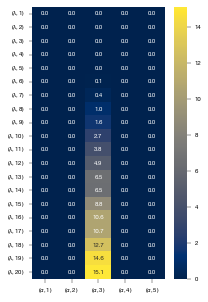

In [8]:
steps_list = range(1, 11) # 11, 21

steps_lambda = range(1, 21) # range(1, 21) # [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80]
steps_alpha = range(1, 6) # range(4, 8) # [3]
rows = [fr'$(\lambda, {i})$' for i in steps_lambda] # steps_list # range(1, 21)]
cols = [fr'$(\alpha, {i})$' for i in steps_alpha] # steps_list # range(1, 6)]

model_probs_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'net_{steps_alpha[j]}_{steps_lambda[i]}'
        net_index = net_names.index(name)
        model_probs_2d[i, j] = model_probs[net_index]

df = pd.DataFrame(model_probs_2d * 100.0, index=rows, columns=cols)

plt.figure(figsize=(3, 5)) # 8, 4 or 6, 8
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.savefig('paper_figures/model_probs_cd44_minimal2.pdf')

In [6]:
print(net_names.index('net_1_1'))
print(net_names.index('net_3_20'))

0
59


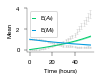

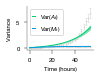

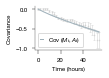

In [7]:
est = res[0]

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
settings = {
    'A_t': {'label': 'E$(A_t)$', 'color': cactiv},
    'M_t': {'label': 'E$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_mean_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_mean_net_1_1.pdf', settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var$(A_t)$', 'color': cactiv},
    ('M_t', 'M_t'): {'label': 'Var$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_variance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_var_net_1_1.pdf', settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': grey}
}
me.plots.est_bestfit_covariance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_cov_net_1_1.pdf', settings=settings)

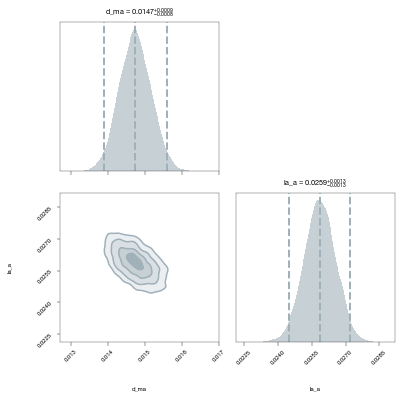

In [8]:
me.plots.est_corner_kernel_plot(est, save='paper_figures/post_cd44_cov_net_1_1.pdf')

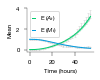

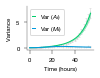

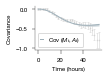

In [9]:
est = res[59]

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})

settings = {
    'A_t': {'label': 'E$(A_t)$', 'color': cactiv},
    'M_t': {'label': 'E$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_mean_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_mean_net_3_20.pdf', settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var$(A_t)$', 'color': cactiv},
    ('M_t', 'M_t'): {'label': 'Var$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_variance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_var_net_3_20.pdf', settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov$(M_t, A_t)$', 'color': grey}
}
me.plots.est_bestfit_covariance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_cov_net_3_20.pdf', settings=settings)

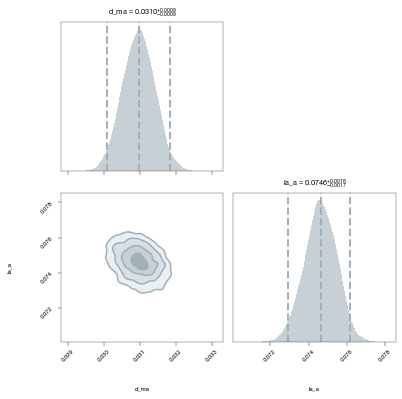

In [10]:
me.plots.est_corner_kernel_plot(est, save='paper_figures/post_cd44_cov_net_3_20.pdf')

##### par2 model results

In [55]:
res = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par2.pickle', 'rb'))
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
log_evids = [est.bay_est_log_evidence for est in res]
print(len(res))

288


In [56]:
sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
log_evids_sorted = np.array(log_evids)[sort_inds]

print(model_probs_sorted[:10])
print(log_evids_sorted[:10])
print(net_names_sorted[:10])

[0.20466724 0.12799195 0.10456966 0.06935069 0.06727789 0.05171219
 0.05031148 0.04723524 0.04024633 0.03639838]
[235.37342517 234.90400709 234.70189318 234.29121587 234.26087143
 233.99773332 233.97027302 233.90717993 233.74705854 233.64656395]
['par2_d_6_8_l_18' 'par2_d_6_8_l_14' 'par2_d_6_8_l_10' 'par2_d_6_10_l_14'
 'par2_d_6_10_l_18' 'par2_d_6_10_l_10' 'par2_d_6_8_l_8' 'par2_d_6_14_l_18'
 'par2_d_6_14_l_14' 'par2_d_6_18_l_14']


In [57]:
est_i = list(model_probs).index(max(model_probs))
print(est_i, net_names[est_i])
est = res[est_i]
print(est.bay_est_log_evidence)

# repair est object due to new memopy version
est.data.data_mean_exists_only = False

183 par2_d_6_8_l_18
235.37342516505308


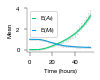

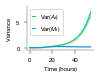

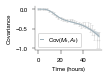

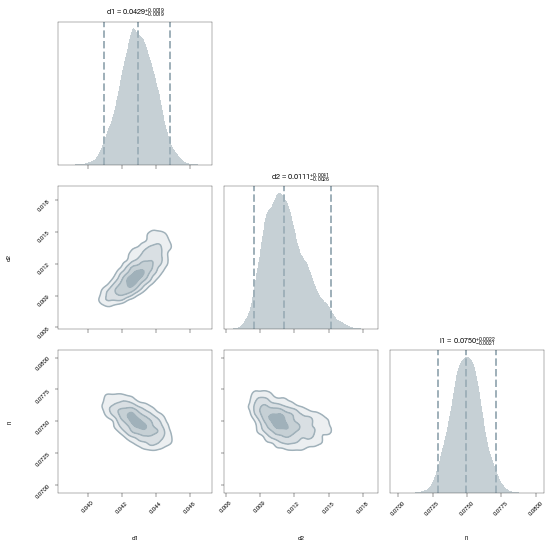

In [29]:
plt.rcParams.update({'figure.figsize': (1.2, 0.8)})

settings = {
    'A_t': {'label': 'E$(A_t)$', 'color': cactiv},
    'M_t': {'label': 'E$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_mean_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_mean_par2_d_6_8_l_18.pdf', settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var$(A_t)$', 'color': cactiv},
    ('M_t', 'M_t'): {'label': 'Var$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_variance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_var_par2_d_6_8_l_18.pdf', settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov$(M_t, A_t)$', 'color': grey}
}
me.plots.est_bestfit_covariance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_cov_par2_d_6_8_l_18.pdf', settings=settings)

me.plots.est_corner_kernel_plot(est, save='paper_figures/post_cd44_par2_d_6_8_l_18.pdf')

In [58]:
# set model prior to give classes same weight
mprior = np.array([1/len(res)]*len(res))
print(sum(mprior))
print(len(mprior))

0.999999999999997
288


In [63]:
# res = [est]
celltype = 1 # 0 or 1 (active, naive)
time_point = -1 # last time point
sample_n = 100 # 1000 # posterior samples of cell histograms; typically 1000-10000
sim_n = 50 # 500 # simulation repeats per given model and theta; ideally, inf
count_max = 16
y = hist_cell_counts_samples(res, celltype, time_point, sample_n, count_max, sim_n, mprior)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[  0.   0. 100.   0.]


In [64]:
print(y.shape)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)

(16, 100)


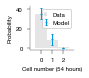

In [65]:
# compute model histogram over all models
plt.rcParams.update({'figure.figsize': (0.8, 0.8)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

linelow = 44*y_95_lower/sim_n
line = 44*y_median/sim_n
lineupp = 44*y_95_upper/sim_n
errlow = line-linelow
errupp = lineupp-line

# plt.fill_between(range(count_max), linelow, line, color=cnaive, alpha=0.2, linewidth=0.0, zorder=100)
# plt.plot(range(count_max), line, color=cnaive, zorder=200, linewidth=1.0)
# plt.fill_between(range(count_max), line, lineupp, color=cnaive, alpha=0.2, linewidth=0.0, zorder=100,
#                 label='Models')
cutplot = 3
plt.errorbar(list(range(count_max))[:cutplot], line[:cutplot], yerr=np.array([errlow, errupp])[:, :cutplot],
            color=cnaive, linewidth=1.0, capsize=1.0,
             zorder=100, markersize=2, fmt='.', label='Model')

plt.hist(res[0].data.data_counts[:, 1, -1], bins=np.linspace(-0.5, 9.5, num=11), 
         color='black', alpha=0.1, label='Data')
plt.xticks([0, 1, 2])
plt.xlim(None, 3)
plt.ylim(-1.5, None)
plt.xlabel('Cell number (54 hours)')
plt.ylabel('Probability')
plt.legend()
plt.savefig(f'paper_figures/hist_cd44_naive_688_par2.pdf', bbox_inches='tight') # _thin4

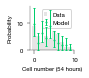

In [62]:
# compute model histogram over all models
plt.rcParams.update({'figure.figsize': (0.8, 0.8)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

linelow = 44*y_95_lower/sim_n
line = 44*y_median/sim_n
lineupp = 44*y_95_upper/sim_n
errlow = line-linelow
errupp = lineupp-line

# plt.fill_between(range(count_max), linelow, line, color=cactiv, alpha=0.2, linewidth=0.0, zorder=100)
# plt.plot(range(count_max), line, color=cactiv, zorder=200, linewidth=1.0)
# plt.fill_between(range(count_max), line, lineupp, color=cactiv, alpha=0.2, linewidth=0.0, zorder=100,
#                 label='Model')
cutplot = 10
plt.errorbar(list(range(count_max))[:cutplot], line[:cutplot], 
             yerr=np.array([errlow, errupp])[:, :cutplot],
            color=cactiv, linewidth=1.0, capsize=1.0,
             zorder=100, markersize=2, fmt='.', label='Model')

plt.hist(res[0].data.data_counts[:, 0, -1], bins=np.linspace(-0.5, 9.5, num=11), 
         color='black', alpha=0.1, label='Data')

plt.xlim(-1, 10)
plt.xlabel('Cell number (54 hours)')
plt.ylabel('Probability')
plt.legend()
plt.savefig(f'paper_figures/hist_cd44_active_688_par2.pdf', bbox_inches='tight') # _thin4

In [105]:
# compare best par2 and best par1+i
print(me.selection.compute_model_probabilities_from_log_evidences(np.array([
    235.37342517, # par2
    234.83804384, # par1+i
])))
print(me.selection.compute_model_bayes_factors_from_log_evidences(np.array([
    235.37342517, # par2
    234.83804384, # par1+i
])))

[0.63073734 0.36926266]
[1.         1.70809947]


##### par1+i results

In [67]:
res = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par1+i.pickle', 'rb'))
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
log_evids = [est.bay_est_log_evidence for est in res]

In [68]:
sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
log_evids_sorted = np.array(log_evids)[sort_inds]

print(model_probs_sorted[:10])
print(log_evids_sorted[:10])
print(net_names_sorted[:10])

[0.3533542  0.25585811 0.22070271 0.11522469 0.04477144 0.00233376
 0.00177736 0.00168872 0.00157189 0.00150213]
[234.83804384 234.51519592 234.36738946 233.71745691 232.77214335
 229.81805518 229.54569958 229.49454366 229.42285088 229.37745537]
['net_6_18' 'net_6_14' 'net_6_10' 'net_6_8' 'net_6_6' 'net_8_10' 'net_8_8'
 'net_8_14' 'net_8_18' 'net_6_4']


In [73]:
est_i = list(model_probs).index(max(model_probs))
print(est_i, net_names[est_i])
est = res[est_i]
est.bay_est_log_evidence

# repair data object (data object is from older memopy version)
est.data.data_mean_exists_only = False

31 net_6_18


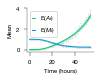

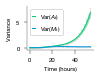

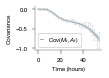

In [42]:
plt.rcParams.update({'figure.figsize': (1.2, 0.8)})

settings = {
    'A_t': {'label': 'E$(A_t)$', 'color': cactiv},
    'M_t': {'label': 'E$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_mean_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_mean_par1+1_net_6_18.pdf', settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var$(A_t)$', 'color': cactiv},
    ('M_t', 'M_t'): {'label': 'Var$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_variance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_var_par1+1_net_6_18.pdf', settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov$(M_t, A_t)$', 'color': grey}
}
me.plots.est_bestfit_covariance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_cov_par1+1_net_6_18.pdf', settings=settings)

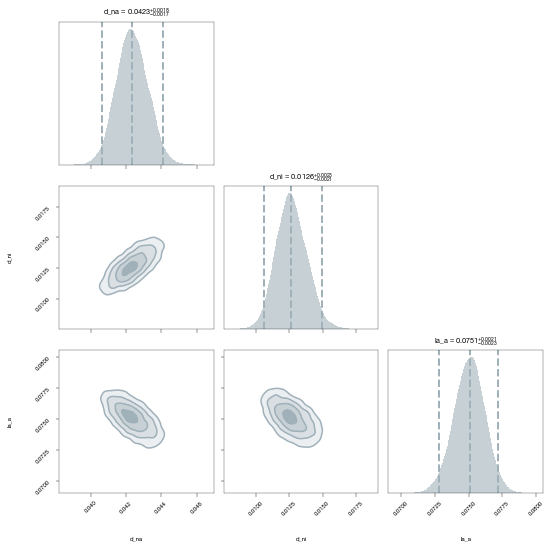

In [43]:
me.plots.est_corner_kernel_plot(est, save='paper_figures/post_cd44_par1+1_net_6_18.pdf')

In [50]:
# compute model probs of best models
# markov, best erlang, par1+i, par2, par3
levids_best_of = np.array([-238.59155040972584, 209.00325377, 234.83804384, 236.3921228756776, 235.88771465])
print(me.selection.compute_model_probabilities_from_log_evidences(levids_best_of))
print(me.selection.compute_model_bayes_factors_from_log_evidences(levids_best_of))

[2.87260572e-207 7.01826244e-013 1.16449163e-001 5.50889281e-001
 3.32661555e-001]
[1.91773371e+206 7.84936850e+011 4.73072769e+000 1.00000000e+000
 1.65600525e+000]


In [81]:
est.bay_est_params_median

array([0.04232   , 0.01262042, 0.07507427])

In [61]:
est.bay_est_log_evidence
est.bay_est_params_median
est.net.net_modules
est.net.net_theta_symbolic

['theta_0', 'theta_1', 'theta_2']

In [13]:
data = res[0].data
mprior = np.array([1/len(res)]*len(res))
print(len(mprior))
print(np.sum(mprior))

64
1.0


In [11]:
# idea to compute "credible bands" for better visualisation
samples = 20000
plot_data = True # True or False
time_max = 60.0 # 150.0, 54.0
x = np.linspace(0.0, time_max, num=200)

y = waiting_time_distr_samples_act(x, res, samples, time_max, mprior)

[    0. 20000.     0.     0.]


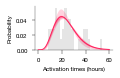

In [14]:
y_997_lower = np.percentile(y, 0.15, axis=1)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_68_lower = np.percentile(y, 16.0, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_68_upper = np.percentile(y, 84.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)
y_997_upper = np.percentile(y, 99.85, axis=1)

plt.rcParams.update({'figure.figsize': (1.4, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# adapted from framework plotting methods
if plot_data:
    data.events_find_all()
    data_act = np.array([tup[1] for tup in data.event_all_first_cell_type_conversion if tup[0]])

    plt.hist(data_act - 1e-06, bins=data.data_time_values,
             color='black', alpha=0.1,
             density=True, histtype='stepfilled')


plt.fill_between(x, y_997_lower, y_95_lower, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_lower, y_68_lower, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_lower, y_median, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)

plt.fill_between(x, y_median, y_68_upper, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_upper, y_95_upper, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_upper, y_997_upper, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)

# plt.plot(x, y_hdi_997_lower, color='lightseagreen', lw=2, alpha=0.2)
# plt.plot(x, y_hdi_95_lower, color='lightseagreen', lw=2, alpha=0.4)
# plt.plot(x, y_hdi_68_lower, color='lightseagreen', lw=2, alpha=0.6)
plt.plot(x, y_median, color=cwact, lw=1, zorder=200)
# plt.plot(x, y_hdi_68_upper, color='lightseagreen', lw=2, alpha=0.6)
# plt.plot(x, y_hdi_95_upper, color='lightseagreen', lw=2, alpha=0.4)
# plt.plot(x, y_hdi_997_upper, color='lightseagreen', lw=2, alpha=0.2)

plt.ylabel('Probability')
plt.xlabel('Activation times (hours)')
plt.savefig('paper_figures/waiting_times_act_par1+i.pdf', bbox_inches='tight') # pdf, png

In [15]:
# idea to compute "credible bands" for better visualisation
samples = 20000
plot_data = False # True or False
time_max = 60.0 # 150.0, 54.0
x = np.linspace(0.0, time_max, num=200)

# NOTE: the data we plot here is only from first divisions! (so its not the complete data, 
# which is inaccessible from the data)

y = waiting_time_distr_samples_div(x, res, samples, time_max, mprior)

[    0. 20000.     0.     0.]


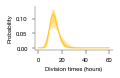

In [16]:
y_997_lower = np.percentile(y, 0.15, axis=1)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_68_lower = np.percentile(y, 16.0, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_68_upper = np.percentile(y, 84.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)
y_997_upper = np.percentile(y, 99.85, axis=1)

plt.rcParams.update({'figure.figsize': (1.4, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# adapted from framework plotting methods
if plot_data:
    data.events_find_all()
    data_act = np.array([tup[1] for tup in data.event_all_first_cell_count_increase_after_cell_type_conversion if tup[0]])

    plt.hist(data_act - 1e-06, bins=data.data_time_values,
             color='black', alpha=0.1,
             density=True, histtype='stepfilled')
    
plt.fill_between(x, y_997_lower, y_95_lower, color=cwdiv, alpha=0.2, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_lower, y_68_lower, color=cwdiv, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_lower, y_median, color=cwdiv, alpha=0.6, linewidth=0.0, zorder=100)

plt.fill_between(x, y_median, y_68_upper, color=cwdiv, alpha=0.6, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_upper, y_95_upper, color=cwdiv, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_upper, y_997_upper, color=cwdiv, alpha=0.2, linewidth=0.0, zorder=100)

# plt.plot(x, y_hdi_997_lower, color='darkorange', lw=0.5, alpha=0.2)
# plt.plot(x, y_hdi_95_lower, color='darkorange', lw=0.5, alpha=0.4)
# plt.plot(x, y_hdi_68_lower, color='blue', lw=0.5, alpha=0.6)
plt.plot(x, y_median, color=cwdiv, lw=1, zorder=200)
# plt.plot(x, y_hdi_68_upper, color='darkorange', lw=0.5, alpha=0.6)
# plt.plot(x, y_hdi_95_upper, color='darkorange', lw=0.5, alpha=0.4)
# plt.plot(x, y_hdi_997_upper, color='darkorange', lw=0.5, alpha=0.2)

plt.ylabel('Probability')
plt.xlabel('Division times (hours)')
plt.savefig('paper_figures/waiting_times_div.pdf', bbox_inches='tight') # pdf, png

In [74]:
# set model prior to give classes same weight
mprior = np.array([1/len(res)]*len(res))
print(sum(mprior))
print(len(mprior))

1.0
64


In [79]:
# res = [est]
celltype = 0 # 0 or 1 (active, naive)
time_point = -1 # last time point
sample_n = 100 # 1000 # posterior samples of cell histograms; typically 1000-10000
sim_n = 50 # 500 # simulation repeats per given model and theta; ideally, inf
count_max = 16
y = hist_cell_counts_samples(res, celltype, time_point, sample_n, count_max, sim_n, mprior)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[  0. 100.   0.   0.]


In [80]:
print(y.shape)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)

(16, 100)


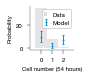

In [81]:
# compute model histogram over all models
plt.rcParams.update({'figure.figsize': (0.8, 0.8)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

linelow = 44*y_95_lower/sim_n
line = 44*y_median/sim_n
lineupp = 44*y_95_upper/sim_n
errlow = line-linelow
errupp = lineupp-line

# plt.fill_between(range(count_max), linelow, line, color=cnaive, alpha=0.2, linewidth=0.0, zorder=100)
# plt.plot(range(count_max), line, color=cnaive, zorder=200, linewidth=1.0)
# plt.fill_between(range(count_max), line, lineupp, color=cnaive, alpha=0.2, linewidth=0.0, zorder=100,
#                 label='Models')
cutplot = 3
plt.errorbar(list(range(count_max))[:cutplot], line[:cutplot], yerr=np.array([errlow, errupp])[:, :cutplot],
            color=cnaive, linewidth=1.0, capsize=1.0,
             zorder=100, markersize=2, fmt='.', label='Model')

plt.hist(res[0].data.data_counts[:, 1, -1], bins=np.linspace(-0.5, 9.5, num=11), 
         color='black', alpha=0.1, label='Data')
plt.xticks([0, 1, 2])
plt.xlim(None, 3)
plt.ylim(-1.5, None)
plt.xlabel('Cell number (54 hours)')
plt.ylabel('Probability')
plt.legend()
plt.savefig(f'paper_figures/hist_cd44_naive_688_par1+i.pdf', bbox_inches='tight') # _thin4

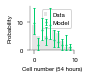

In [82]:
# compute model histogram over all models
plt.rcParams.update({'figure.figsize': (0.8, 0.8)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

linelow = 44*y_95_lower/sim_n
line = 44*y_median/sim_n
lineupp = 44*y_95_upper/sim_n
errlow = line-linelow
errupp = lineupp-line

# plt.fill_between(range(count_max), linelow, line, color=cactiv, alpha=0.2, linewidth=0.0, zorder=100)
# plt.plot(range(count_max), line, color=cactiv, zorder=200, linewidth=1.0)
# plt.fill_between(range(count_max), line, lineupp, color=cactiv, alpha=0.2, linewidth=0.0, zorder=100,
#                 label='Model')
cutplot = 10
plt.errorbar(list(range(count_max))[:cutplot], line[:cutplot], 
             yerr=np.array([errlow, errupp])[:, :cutplot],
            color=cactiv, linewidth=1.0, capsize=1.0,
             zorder=100, markersize=2, fmt='.', label='Model')

plt.hist(res[0].data.data_counts[:, 0, -1], bins=np.linspace(-0.5, 9.5, num=11), 
         color='black', alpha=0.1, label='Data')

plt.xlim(-1, 10)
plt.xlabel('Cell number (54 hours)')
plt.ylabel('Probability')
plt.legend()
plt.savefig(f'paper_figures/hist_cd44_active_688_par1+i.pdf', bbox_inches='tight') # _thin4

In [88]:
import itertools
steps_list = [1, 2, 4, 6, 8, 10, 14, 18] # [2, 4, 6, 8, 10, 14, 18]
sparse_steps_list = list(itertools.combinations_with_replacement(steps_list, 2))
for d1, d2 in sparse_steps_list:
    pass
d1, d2

(18, 18)

##### par3 model results

In [20]:
res = pickle.load(open('estimation_count_data_cd44_filtered_sigma022_par3.pickle', 'rb'))
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
log_evids = [est.bay_est_log_evidence for est in res]

In [21]:
sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
log_evids_sorted = np.array(log_evids)[sort_inds]

print(model_probs_sorted[:10])
print(log_evids_sorted[:10])
print(net_names_sorted[:10])

[0.0278788  0.02550369 0.02247498 0.02124972 0.02028658 0.02023628
 0.01975946 0.01950185 0.01909961 0.01891333]
[235.88771465 235.79867124 235.67225071 235.61619157 235.56980755
 235.5673253  235.54348052 235.53035758 235.5095162  235.49971511]
['net_alphaF6_alphaS6_alphaT6_lambda14'
 'net_alphaF6_alphaS6_alphaT6_lambda18'
 'net_alphaF8_alphaS8_alphaT18_lambda14'
 'net_alphaF4_alphaS6_alphaT6_lambda18'
 'net_alphaF8_alphaS8_alphaT18_lambda18'
 'net_alphaF6_alphaS6_alphaT14_lambda14'
 'net_alphaF6_alphaS6_alphaT18_lambda18'
 'net_alphaF6_alphaS6_alphaT6_lambda10'
 'net_alphaF6_alphaS8_alphaT14_lambda14'
 'net_alphaF6_alphaS6_alphaT14_lambda18']


In [22]:
est_i = list(model_probs).index(max(model_probs))
print(est_i, net_names[est_i])
est = res[est_i]
est.bay_est_log_evidence

348 net_alphaF6_alphaS6_alphaT6_lambda14


235.88771464915

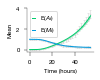

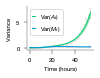

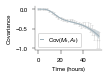

In [14]:
plt.rcParams.update({'figure.figsize': (1.2, 0.8)})

settings = {
    'A_t': {'label': 'E$(A_t)$', 'color': cactiv},
    'M_t': {'label': 'E$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_mean_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_mean_net_alphaF6_alphaS6_alphaT6_lambda14.pdf', settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var$(A_t)$', 'color': cactiv},
    ('M_t', 'M_t'): {'label': 'Var$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_variance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_var_net_alphaF6_alphaS6_alphaT6_lambda14.pdf', settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov$(M_t, A_t)$', 'color': grey}
}
me.plots.est_bestfit_covariance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_cov_net_alphaF6_alphaS6_alphaT6_lambda14.pdf', settings=settings)

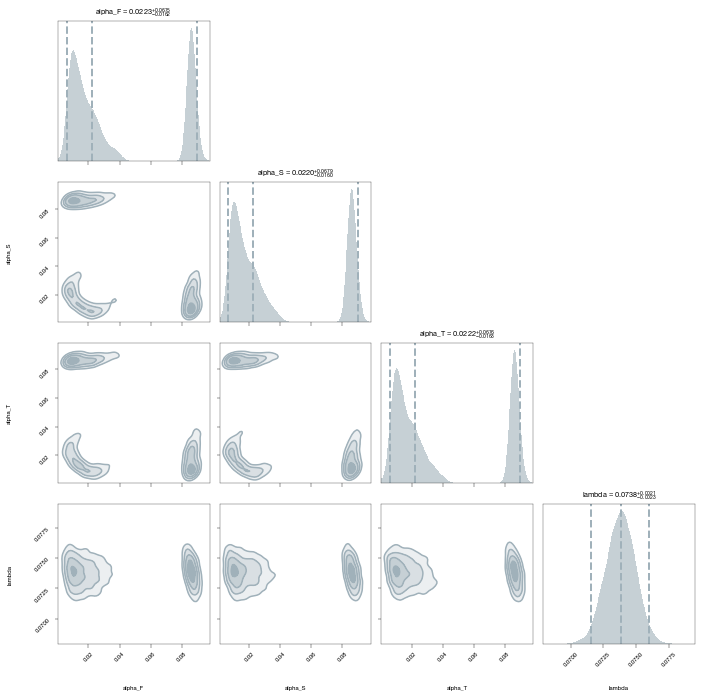

In [15]:
me.plots.est_corner_kernel_plot(est, save='paper_figures/post_cd44_cov_net_alphaF6_alphaS6_alphaT6_lambda14.pdf')

##### summary plots

In [3]:
res1 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_minimal2.pickle', 'rb'))
res2 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par2.pickle', 'rb'))
res3 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par3_new.pickle', 'rb'))
res = res1 + res2 + res3
print(len(res1), len(res2), len(res3), len(res))

100 288 588 976


In [4]:
net_names = [est.net.net_name for est in res]
mprior = np.array([0.25] + [0.25/99]*99 + [0.25/288]*288 + [0.25/588]*588)
print(sum(mprior))
model_probs = me.selection.compute_model_probabilities(res, mprior=mprior)
print(len(model_probs))

1.000000000000017
976


In [5]:
print(len(model_probs[0:1]))
print(len(model_probs[1:100]))
print(len(model_probs[100:388]))
print(len(model_probs[388:]))

1
99
288
588


4.452090637016675e-205
5.831857248046224e-12
0.557374194770303
0.4426258052238786


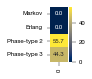

In [6]:
print(sum(model_probs[0:1]))
print(sum(model_probs[1:100]))
print(sum(model_probs[100:388]))
print(sum(model_probs[388:]))

plt.figure(figsize=(0.4,1))
df = pd.DataFrame(np.array([model_probs[0], sum(model_probs[1:100]), sum(model_probs[100:388]), sum(model_probs[388:])]) * 100.0, index=['Markov', 'Erlang', 'Phase-type 2', 'Phase-type 3']) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=90)
plt.savefig('paper_figures/models_probs_map.pdf', bbox_inches='tight')

59
183
349
59
183
349
283
1.0790882757157929e-206
2.1136588251598973e-12
0.7963072164813105
0.20369278351656742
net_3_20 par2_d_6_8_l_18 par3_d_6_6_6_l_18


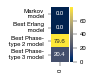

In [10]:
res1_probs = me.selection.compute_model_probabilities(res1)
res2_probs = me.selection.compute_model_probabilities(res2)
res3_probs = me.selection.compute_model_probabilities(res3)
print(list(res1_probs).index(max(res1_probs)))
print(list(res2_probs).index(max(res2_probs)))
print(list(res3_probs).index(max(res3_probs)))
print(list(model_probs[0:100]).index(max(model_probs[0:100])))
print(list(model_probs[100:388]).index(max(model_probs[100:388])))
print(list(model_probs[388:]).index(max(model_probs[388:])))
print(list(model_probs).index(max(model_probs)))

bestof_probs = me.selection.compute_model_probabilities([
                res[0], res[59], res[183+100], res[349+100+288]])

print(bestof_probs[0])
print(bestof_probs[1])
print(bestof_probs[2])
print(bestof_probs[3])

plt.figure(figsize=(0.4,1))
df = pd.DataFrame(np.array([bestof_probs[0], bestof_probs[1], bestof_probs[2], bestof_probs[3]]) * 100.0, index=['Markov\n model', 'Best Erlang\n model', 'Best Phase-\n type 2 model', 'Best Phase-\n type 3 model']) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=90)
plt.savefig('paper_figures/models_probs_map_bestof.pdf', bbox_inches='tight')

print(net_names[59], net_names[183+100], net_names[349+100+288])

86
798
(884,)


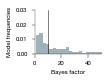

In [56]:
plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
bf = me.selection.compute_model_bayes_factors(res)
bf[bf > 100.0] = 100.0
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xlim((0, 50)) # 110
plt.ylim((None, 0.03))
plt.hist(bf, density=True, color=grey, bins=40)
plt.axvline(x=10.0, lw=0.5, color='black')
plt.xlabel('Bayes factor')
plt.ylabel('Model frequencies')
plt.savefig('paper_figures/bfs_cd44_full.pdf', bbox_inches='tight')

print(np.sum(bf < 10.0))
print(np.sum(bf >= 10.0))
print(bf.shape)

884
True


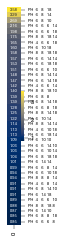

In [57]:
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
print(len(model_probs))

ntop = 40

sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]

# check if all ntop models are phase type
is_ph = True
for name in net_names_sorted[0:ntop]:
    if 'alphaF' in name:
        pass
    else:
        is_ph = False
print(is_ph)
    
def process_net_names(net_names):
    net_names_style = list()
    for name in net_names:
        name_style = str(name[4:])
        name_style = name_style.replace('_', r', ')
        name_style = name_style.replace('alphaF', r'$n_{\alpha_1}$=')
        name_style = name_style.replace('alphaS', r'$n_{\alpha_2}$=')
        name_style = name_style.replace('alphaT', r'$n_{\alpha_3}$=')
        name_style = name_style.replace('lambda', r'$n_{\lambda}$=')
        net_names_style.append(name_style)
    return net_names_style

def process_net_names_simple(net_names):
    net_names_style = list()
    for name in net_names:
        name_style = str(name[4:])
        name_style = name_style.replace('_', ' ')
        name_style = name_style.replace('alphaF1', '1')
        name_style = name_style.replace('alphaF2', '2  ')
        name_style = name_style.replace('alphaF4', '4  ')
        name_style = name_style.replace('alphaF6', '6  ')
        name_style = name_style.replace('alphaF8', '8  ')
        
        name_style = name_style.replace('alphaS1', '1')
        name_style = name_style.replace('alphaS2', '2  ')
        name_style = name_style.replace('alphaS4', '4  ')
        name_style = name_style.replace('alphaS6', '6  ')
        name_style = name_style.replace('alphaS8', '8  ')
        
        name_style = name_style.replace('alphaT1', '1')
        name_style = name_style.replace('alphaT2', '2  ')
        name_style = name_style.replace('alphaT4', '4  ')
        name_style = name_style.replace('alphaT6', '6  ')
        name_style = name_style.replace('alphaT8', '8  ')
        
        name_style = name_style.replace('lambda1', '1')
        name_style = name_style.replace('lambda2', '2')
        name_style = name_style.replace('lambda4', '4')
        name_style = name_style.replace('lambda6', '6')
        name_style = name_style.replace('lambda8', '8')
        name_style = 'PH  ' + name_style
        net_names_style.append(name_style)
    return net_names_style

plt.rcParams.update({'mathtext.default':  'regular' })
plt.figure(figsize=(0.3,4.0))
df = pd.DataFrame(np.array([model_probs_sorted[:ntop]]).T * 100.0, index=process_net_names_simple(net_names_sorted[:ntop])) # , index=rows
g = sns.heatmap(df, cmap='cividis', annot=True, fmt='.2f', annot_kws={"size":4}, yticklabels=True) # annot=True
ax = plt.gca()
ax.tick_params(right=True, left=False, labelright=True, labelleft=False)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 4)
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=90)
plt.savefig('paper_figures/models_probs_map_single.pdf', bbox_inches='tight')

In [58]:
len(model_probs_sorted[:40])

40

##### waiting times

In [24]:
res1 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_minimal2.pickle', 'rb'))
res2 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par2.pickle', 'rb'))
res3 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par3_new.pickle', 'rb'))
res = res1 + res2 + res3
print(len(res1), len(res2), len(res3), len(res))

net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
data = res[0].data
# print(sum(['alphaF' in name for name in net_names]))

100 288 588 976


In [25]:
# set model prior to give classes same weight
mprior = np.array([0.25] + [0.25/99]*99 + [0.25/288]*288 + [0.25/588]*588)
print(sum(mprior))
print(len(mprior))

1.000000000000017
976


In [31]:
# idea to compute "credible bands" for better visualisation
samples = 40000
plot_data = True # True or False
time_max = 60.0 # 60.0, 100.0, 200.0, 150.0, 54.0
x = np.linspace(0.0, time_max, num=200)

y = waiting_time_distr_samples_act(x, res, samples, time_max, mprior)

[    0.     0. 22279. 17721.]


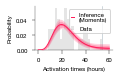

In [33]:
y_997_lower = np.percentile(y, 0.15, axis=1)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_68_lower = np.percentile(y, 16.0, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_68_upper = np.percentile(y, 84.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)
y_997_upper = np.percentile(y, 99.85, axis=1)

plt.rcParams.update({'figure.figsize': (1.8, 0.8)}) # 1.4, 1.8, 
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# adapted from framework plotting methods
if plot_data:
    data.events_find_all()
    data_act = np.array([tup[1] for tup in data.event_all_first_cell_type_conversion if tup[0]])

    plt.hist(data_act - 1e-06, bins=data.data_time_values,
             color='black', alpha=0.1,
             density=True, histtype='stepfilled', label='Data')


plt.fill_between(x, y_997_lower, y_95_lower, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_lower, y_68_lower, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_lower, y_median, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)

plt.fill_between(x, y_median, y_68_upper, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_upper, y_95_upper, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_upper, y_997_upper, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)

# plt.plot(x, y_hdi_997_lower, color='lightseagreen', lw=2, alpha=0.2)
# plt.plot(x, y_hdi_95_lower, color='lightseagreen', lw=2, alpha=0.4)
# plt.plot(x, y_hdi_68_lower, color='lightseagreen', lw=2, alpha=0.6)
plt.plot(x, y_median, color=cwact, lw=1, zorder=200, label='Inference \n(Moments)')
# plt.plot(x, y_hdi_68_upper, color='lightseagreen', lw=2, alpha=0.6)
# plt.plot(x, y_hdi_95_upper, color='lightseagreen', lw=2, alpha=0.4)
# plt.plot(x, y_hdi_997_upper, color='lightseagreen', lw=2, alpha=0.2)

# plot experimental window
plt.axvline(x=54.0, linewidth=0.5, color=grey)

# plt.xticks([0, 20, 40, 54, 100], [0, 20, 40, 54, 100])

plt.legend()
plt.ylabel('Probability')
plt.xlabel('Activation times (hours)')
plt.savefig('paper_figures/waiting_times_act.pdf', bbox_inches='tight') # _long200 # pdf, png

In [38]:
# how does it look for best-model only?
samples = 40000
plot_data = True # True or False
time_max = 100.0 # 60.0, 100.0, 200.0
x = np.linspace(0.0, time_max, num=200)

y = waiting_time_distr_samples_act(x, [res[183+100]], samples, time_max, np.array([1.0]))
print(net_names[183+100])

[    0.     0. 40000.     0.]
par2_d_6_8_l_18


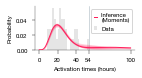

In [39]:
y_997_lower = np.percentile(y, 0.15, axis=1)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_68_lower = np.percentile(y, 16.0, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_68_upper = np.percentile(y, 84.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)
y_997_upper = np.percentile(y, 99.85, axis=1)

plt.rcParams.update({'figure.figsize': (1.8, 0.8)}) # 1.4, 1.8
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# adapted from framework plotting methods
if plot_data:
    data.events_find_all()
    data_act = np.array([tup[1] for tup in data.event_all_first_cell_type_conversion if tup[0]])

    plt.hist(data_act - 1e-06, bins=data.data_time_values,
             color='black', alpha=0.1,
             density=True, histtype='stepfilled', label='Data')

plt.fill_between(x, y_997_lower, y_95_lower, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_lower, y_68_lower, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_lower, y_median, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)

plt.fill_between(x, y_median, y_68_upper, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_upper, y_95_upper, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_upper, y_997_upper, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)

# plt.plot(x, y_hdi_997_lower, color='lightseagreen', lw=2, alpha=0.2)
# plt.plot(x, y_hdi_95_lower, color='lightseagreen', lw=2, alpha=0.4)
# plt.plot(x, y_hdi_68_lower, color='lightseagreen', lw=2, alpha=0.6)
plt.plot(x, y_median, color=cwact, lw=1, zorder=200, label='Inference \n(Moments)')
# plt.plot(x, y_hdi_68_upper, color='lightseagreen', lw=2, alpha=0.6)
# plt.plot(x, y_hdi_95_upper, color='lightseagreen', lw=2, alpha=0.4)
# plt.plot(x, y_hdi_997_upper, color='lightseagreen', lw=2, alpha=0.2)

# plot experimental window
plt.axvline(x=54.0, linewidth=0.5, color=grey)

plt.xticks([0, 20, 40, 54, 100], [0, 20, 40, 54, 100])

plt.legend()
plt.ylabel('Probability')
plt.xlabel('Activation times (hours)')
plt.savefig('paper_figures/waiting_times_act_par2_d_6_8_l_18_long100.pdf', bbox_inches='tight') # _long200 # pdf, png

In [40]:
# idea to compute "credible bands" for better visualisation
print(len(res))
samples = 40000
plot_data = False # True or False
time_max = 54.0 # 150.0, 54.0
x = np.linspace(0.0, time_max, num=200)

# NOTE: the data we plot here is only from first divisions! (so its not the complete data, 
# which is inaccessible from the data)

y = waiting_time_distr_samples_div(x, res, samples, time_max, mprior)

976
[    0.     0. 22176. 17824.]


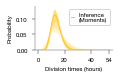

In [42]:
y_997_lower = np.percentile(y, 0.15, axis=1)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_68_lower = np.percentile(y, 16.0, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_68_upper = np.percentile(y, 84.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)
y_997_upper = np.percentile(y, 99.85, axis=1)

# figure size adapted to fit activation times scale
plt.rcParams.update({'figure.figsize': (1.4, 0.8)}) # 1.4, 0.97
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# adapted from framework plotting methods
if plot_data:
    data.events_find_all()
    data_act = np.array([tup[1] for tup in data.event_all_first_cell_count_increase_after_cell_type_conversion if tup[0]])

    plt.hist(data_act - 1e-06, bins=data.data_time_values,
             color='black', alpha=0.1,
             density=True, histtype='stepfilled', label='Data')
    
plt.fill_between(x, y_997_lower, y_95_lower, color=cwdiv, alpha=0.2, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_lower, y_68_lower, color=cwdiv, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_lower, y_median, color=cwdiv, alpha=0.6, linewidth=0.0, zorder=100)

plt.fill_between(x, y_median, y_68_upper, color=cwdiv, alpha=0.6, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_upper, y_95_upper, color=cwdiv, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_upper, y_997_upper, color=cwdiv, alpha=0.2, linewidth=0.0, zorder=100)

# plt.plot(x, y_hdi_997_lower, color='darkorange', lw=0.5, alpha=0.2)
# plt.plot(x, y_hdi_95_lower, color='darkorange', lw=0.5, alpha=0.4)
# plt.plot(x, y_hdi_68_lower, color='blue', lw=0.5, alpha=0.6)
plt.plot(x, y_median, color=cwdiv, lw=1, zorder=200, label='Inference \n(Moments)')
# plt.plot(x, y_hdi_68_upper, color='darkorange', lw=0.5, alpha=0.6)
# plt.plot(x, y_hdi_95_upper, color='darkorange', lw=0.5, alpha=0.4)
# plt.plot(x, y_hdi_997_upper, color='darkorange', lw=0.5, alpha=0.2)

plt.xticks([0, 20, 40, 54], [0, 20, 40, 54])
plt.ylim(0.0, None)

plt.legend()
plt.ylabel('Probability')
plt.xlabel('Division times (hours)')
plt.savefig('paper_figures/waiting_times_div_unscaled.pdf', bbox_inches='tight') # pdf, png

In [43]:
# best model only
samples = 40000
plot_data = False # True or False
time_max = 54.0 # 150.0, 54.0
x = np.linspace(0.0, time_max, num=200)

# NOTE: the data we plot here is only from first divisions! (so its not the complete data, 
# which is inaccessible from the data)

y = waiting_time_distr_samples_div(x, [res[183+100]], samples, time_max, np.array([1.0]))

[    0.     0. 40000.     0.]


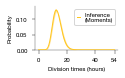

In [45]:
y_997_lower = np.percentile(y, 0.15, axis=1)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_68_lower = np.percentile(y, 16.0, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_68_upper = np.percentile(y, 84.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)
y_997_upper = np.percentile(y, 99.85, axis=1)

# figure size adapted to fit activation times scale
plt.rcParams.update({'figure.figsize': (1.4, 0.8)}) # 1.4, 0.97
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# adapted from framework plotting methods
if plot_data:
    data.events_find_all()
    data_act = np.array([tup[1] for tup in data.event_all_first_cell_count_increase_after_cell_type_conversion if tup[0]])

    plt.hist(data_act - 1e-06, bins=data.data_time_values,
             color='black', alpha=0.1,
             density=True, histtype='stepfilled', label='Data')
    
plt.fill_between(x, y_997_lower, y_95_lower, color=cwdiv, alpha=0.2, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_lower, y_68_lower, color=cwdiv, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_lower, y_median, color=cwdiv, alpha=0.6, linewidth=0.0, zorder=100)

plt.fill_between(x, y_median, y_68_upper, color=cwdiv, alpha=0.6, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_upper, y_95_upper, color=cwdiv, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_upper, y_997_upper, color=cwdiv, alpha=0.2, linewidth=0.0, zorder=100)

# plt.plot(x, y_hdi_997_lower, color='darkorange', lw=0.5, alpha=0.2)
# plt.plot(x, y_hdi_95_lower, color='darkorange', lw=0.5, alpha=0.4)
# plt.plot(x, y_hdi_68_lower, color='blue', lw=0.5, alpha=0.6)
plt.plot(x, y_median, color=cwdiv, lw=1, zorder=200, label='Inference \n(Moments)')
# plt.plot(x, y_hdi_68_upper, color='darkorange', lw=0.5, alpha=0.6)
# plt.plot(x, y_hdi_95_upper, color='darkorange', lw=0.5, alpha=0.4)
# plt.plot(x, y_hdi_997_upper, color='darkorange', lw=0.5, alpha=0.2)

plt.xticks([0, 20, 40, 54], [0, 20, 40, 54])
plt.ylim(0.0, None)

plt.legend()
plt.ylabel('Probability')
plt.xlabel('Division times (hours)')
plt.savefig('paper_figures/waiting_times_div_par2_d_6_8_l_18_unscaled.pdf', bbox_inches='tight') # pdf, png

##### compare old/new (after multiedge correction) par3 results
- more than 99% correlation
- afterwards old files were deleted and new files renamed (same name as previous old files)

In [64]:
# sigma022 / full data
res_new = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par3_new.pickle', 'rb'))
res_old = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par3.pickle', 'rb'))

In [65]:
print(len(res_new))
print(len(res_old))

588
588


In [66]:
net_names_new = [est.net.net_name for est in res_new]
model_probs_new = me.selection.compute_model_probabilities(res_new)
evids_new =  [est.bay_est_log_evidence for est in res_new]

In [67]:
net_names_old = [est.net.net_name for est in res_old]
model_probs_old = me.selection.compute_model_probabilities(res_old)
evids_old =  [est.bay_est_log_evidence for est in res_old]

In [68]:
print(net_names_new[:20])
print(net_names_old[:20])

['par3_d_2_2_2_l_2', 'par3_d_2_2_2_l_4', 'par3_d_2_2_2_l_6', 'par3_d_2_2_2_l_8', 'par3_d_2_2_2_l_10', 'par3_d_2_2_2_l_14', 'par3_d_2_2_2_l_18', 'par3_d_2_2_4_l_2', 'par3_d_2_2_4_l_4', 'par3_d_2_2_4_l_6', 'par3_d_2_2_4_l_8', 'par3_d_2_2_4_l_10', 'par3_d_2_2_4_l_14', 'par3_d_2_2_4_l_18', 'par3_d_2_2_6_l_2', 'par3_d_2_2_6_l_4', 'par3_d_2_2_6_l_6', 'par3_d_2_2_6_l_8', 'par3_d_2_2_6_l_10', 'par3_d_2_2_6_l_14']
['net_alphaF2_alphaS2_alphaT2_lambda2', 'net_alphaF2_alphaS2_alphaT2_lambda4', 'net_alphaF2_alphaS2_alphaT2_lambda6', 'net_alphaF2_alphaS2_alphaT2_lambda8', 'net_alphaF2_alphaS2_alphaT2_lambda10', 'net_alphaF2_alphaS2_alphaT2_lambda14', 'net_alphaF2_alphaS2_alphaT2_lambda18', 'net_alphaF2_alphaS2_alphaT4_lambda2', 'net_alphaF2_alphaS2_alphaT4_lambda4', 'net_alphaF2_alphaS2_alphaT4_lambda6', 'net_alphaF2_alphaS2_alphaT4_lambda8', 'net_alphaF2_alphaS2_alphaT4_lambda10', 'net_alphaF2_alphaS2_alphaT4_lambda14', 'net_alphaF2_alphaS2_alphaT4_lambda18', 'net_alphaF2_alphaS2_alphaT6_lambda2',

In [69]:
sort_inds_new = np.array(- model_probs_new).argsort()
net_names_sorted_new = np.array(net_names_new)[sort_inds_new]
model_probs_sorted_new = np.array(model_probs_new)[sort_inds_new]
log_evids_sorted_new = np.array(evids_new)[sort_inds_new]

print(model_probs_sorted_new[:10])
print(log_evids_sorted_new[:10])
print(net_names_sorted_new[:10])
print(sum(model_probs_sorted_new[:50]))

[0.03229004 0.02851055 0.02787329 0.02469745 0.02439521 0.0233535
 0.01892786 0.01879264 0.01830252 0.01800178]
[234.010053   233.8855683  233.86296293 233.74199392 233.72968096
 233.68604111 233.47592927 233.46875946 233.44233293 233.42576503]
['par3_d_6_6_6_l_18' 'par3_d_6_6_6_l_14' 'par3_d_6_6_14_l_18'
 'par3_d_6_6_14_l_14' 'par3_d_8_8_18_l_18' 'par3_d_8_8_18_l_14'
 'par3_d_6_6_18_l_18' 'par3_d_4_6_6_l_18' 'par3_d_6_6_8_l_14'
 'par3_d_8_8_14_l_18']
0.6844357268888983


In [70]:
# before multigraph evidences should be a bit higher
# due to different prior space for the act parameters
sort_inds_old = np.array(- model_probs_old).argsort()
net_names_sorted_old = np.array(net_names_old)[sort_inds_old]
model_probs_sorted_old = np.array(model_probs_old)[sort_inds_old]
log_evids_sorted_old = np.array(evids_old)[sort_inds_old]

print(model_probs_sorted_old[:10])
print(log_evids_sorted_old[:10])
print(net_names_sorted_old[:10])
print(sum(model_probs_sorted_old[:50]))

[0.0278788  0.02550369 0.02247498 0.02124972 0.02028658 0.02023628
 0.01975946 0.01950185 0.01909961 0.01891333]
[235.88771465 235.79867124 235.67225071 235.61619157 235.56980755
 235.5673253  235.54348052 235.53035758 235.5095162  235.49971511]
['net_alphaF6_alphaS6_alphaT6_lambda14'
 'net_alphaF6_alphaS6_alphaT6_lambda18'
 'net_alphaF8_alphaS8_alphaT18_lambda14'
 'net_alphaF4_alphaS6_alphaT6_lambda18'
 'net_alphaF8_alphaS8_alphaT18_lambda18'
 'net_alphaF6_alphaS6_alphaT14_lambda14'
 'net_alphaF6_alphaS6_alphaT18_lambda18'
 'net_alphaF6_alphaS6_alphaT6_lambda10'
 'net_alphaF6_alphaS8_alphaT14_lambda14'
 'net_alphaF6_alphaS6_alphaT14_lambda18']
0.6785084046111731


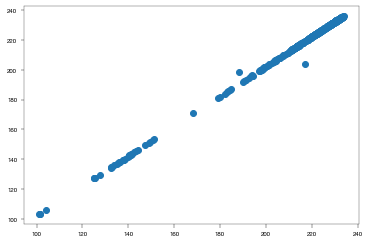

In [72]:
plt.scatter(evids_new, evids_old)

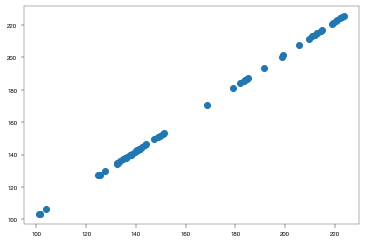

In [73]:
plt.scatter(evids_new[:60], evids_old[:60])

In [74]:
model_rank_new = np.array(list(range(0, len(res_new))))
model_rank_old = np.array(list(range(0, len(res_old))))

inds = np.array(evids_new).argsort()
model_rank_new_sorted = model_rank_new[inds]

inds = np.array(evids_old).argsort()
model_rank_old_sorted = model_rank_old[inds]

x_rank = list(range(0, len(res_new)))
y_rank = list()
for x in x_rank:
    ind_new = model_rank_new_sorted[x]
    y_rank.append(list(model_rank_old_sorted).index(ind_new))

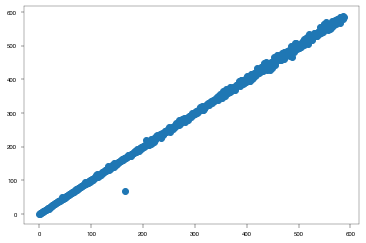

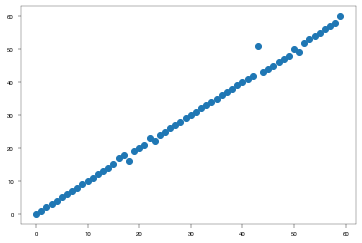

In [75]:
plt.scatter(x_rank, y_rank)
plt.show()
plt.scatter(x_rank[:60], y_rank[:60])

In [76]:
print(np.corrcoef(x_rank, y_rank)[0, 1])
print(stats.pearsonr(x_rank, y_rank))
print(stats.spearmanr(x_rank, y_rank))
print(stats.pearsonr(evids_new, evids_old))
print(stats.spearmanr(evids_new, evids_old))

0.9993244362761605
(0.9993244362761604, 0.0)
SpearmanrResult(correlation=0.9993244362761605, pvalue=0.0)
(0.9995343531138717, 0.0)
SpearmanrResult(correlation=0.9993244362761605, pvalue=0.0)


In [43]:
# thin4 / sparse data
res_new = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par3_new.pickle', 'rb'))
res_old = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par3.pickle', 'rb'))

In [44]:
print(len(res_new))
print(len(res_old))

588
588


In [45]:
net_names_new = [est.net.net_name for est in res_new]
model_probs_new = me.selection.compute_model_probabilities(res_new)
evids_new =  [est.bay_est_log_evidence for est in res_new]

In [46]:
net_names_old = [est.net.net_name for est in res_old]
model_probs_old = me.selection.compute_model_probabilities(res_old)
evids_old =  [est.bay_est_log_evidence for est in res_old]

In [47]:
print(net_names_new[:20])
print(net_names_old[:20])

['par3_d_2_2_2_l_2', 'par3_d_2_2_2_l_4', 'par3_d_2_2_2_l_6', 'par3_d_2_2_2_l_8', 'par3_d_2_2_2_l_10', 'par3_d_2_2_2_l_14', 'par3_d_2_2_2_l_18', 'par3_d_2_2_4_l_2', 'par3_d_2_2_4_l_4', 'par3_d_2_2_4_l_6', 'par3_d_2_2_4_l_8', 'par3_d_2_2_4_l_10', 'par3_d_2_2_4_l_14', 'par3_d_2_2_4_l_18', 'par3_d_2_2_6_l_2', 'par3_d_2_2_6_l_4', 'par3_d_2_2_6_l_6', 'par3_d_2_2_6_l_8', 'par3_d_2_2_6_l_10', 'par3_d_2_2_6_l_14']
['net_alphaF2_alphaS2_alphaT2_lambda2', 'net_alphaF2_alphaS2_alphaT2_lambda4', 'net_alphaF2_alphaS2_alphaT2_lambda6', 'net_alphaF2_alphaS2_alphaT2_lambda8', 'net_alphaF2_alphaS2_alphaT2_lambda10', 'net_alphaF2_alphaS2_alphaT2_lambda14', 'net_alphaF2_alphaS2_alphaT2_lambda18', 'net_alphaF2_alphaS2_alphaT4_lambda2', 'net_alphaF2_alphaS2_alphaT4_lambda4', 'net_alphaF2_alphaS2_alphaT4_lambda6', 'net_alphaF2_alphaS2_alphaT4_lambda8', 'net_alphaF2_alphaS2_alphaT4_lambda10', 'net_alphaF2_alphaS2_alphaT4_lambda14', 'net_alphaF2_alphaS2_alphaT4_lambda18', 'net_alphaF2_alphaS2_alphaT6_lambda2',

In [48]:
sort_inds_new = np.array(- model_probs_new).argsort()
net_names_sorted_new = np.array(net_names_new)[sort_inds_new]
model_probs_sorted_new = np.array(model_probs_new)[sort_inds_new]
log_evids_sorted_new = np.array(evids_new)[sort_inds_new]

print(model_probs_sorted_new[:10])
print(log_evids_sorted_new[:10])
print(net_names_sorted_new[:10])
print(sum(model_probs_sorted_new[:50]))

[0.00774502 0.00677408 0.00655376 0.00632032 0.00631222 0.00628908
 0.00615655 0.00613638 0.00597971 0.00590962]
[40.24433835 40.11039233 40.07732686 40.0410586  40.039775   40.03610223
 40.0148049  40.01152351 39.98565957 39.97387043]
['par3_d_6_8_18_l_18' 'par3_d_6_8_18_l_14' 'par3_d_4_6_14_l_14'
 'par3_d_4_6_14_l_18' 'par3_d_6_6_14_l_18' 'par3_d_4_8_18_l_18'
 'par3_d_4_8_14_l_14' 'par3_d_6_6_18_l_14' 'par3_d_4_8_14_l_18'
 'par3_d_6_6_18_l_18']
0.2616003050832625


In [49]:
# before multigraph evidences should be a bit higher
# due to different prior space for the act parameters
sort_inds_old = np.array(- model_probs_old).argsort()
net_names_sorted_old = np.array(net_names_old)[sort_inds_old]
model_probs_sorted_old = np.array(model_probs_old)[sort_inds_old]
log_evids_sorted_old = np.array(evids_old)[sort_inds_old]

print(model_probs_sorted_old[:10])
print(log_evids_sorted_old[:10])
print(net_names_sorted_old[:10])
print(sum(model_probs_sorted_old[:50]))

[0.00682825 0.0064529  0.00640415 0.0063508  0.00611113 0.00609673
 0.00594808 0.00582334 0.00563253 0.00550594]
[42.13480759 42.07826876 42.0706862  42.06231989 42.02385062 42.02149161
 41.99680829 41.97561427 41.94229751 41.91956713]
['net_alphaF6_alphaS6_alphaT14_lambda18'
 'net_alphaF6_alphaS6_alphaT14_lambda14'
 'net_alphaF6_alphaS6_alphaT18_lambda14'
 'net_alphaF6_alphaS8_alphaT18_lambda18'
 'net_alphaF6_alphaS8_alphaT18_lambda14'
 'net_alphaF6_alphaS6_alphaT18_lambda18'
 'net_alphaF6_alphaS6_alphaT14_lambda10'
 'net_alphaF4_alphaS6_alphaT10_lambda18'
 'net_alphaF4_alphaS8_alphaT18_lambda18'
 'net_alphaF4_alphaS8_alphaT18_lambda14']
0.25257799081049176


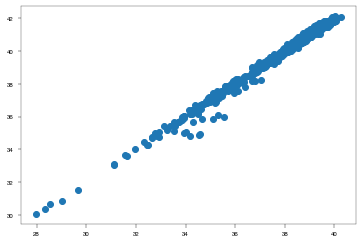

In [60]:
plt.scatter(evids_new, evids_old)

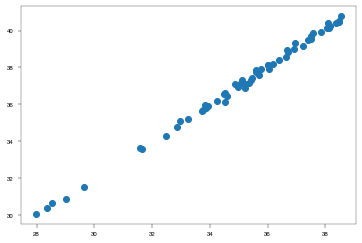

In [61]:
plt.scatter(evids_new[:60], evids_old[:60])

In [53]:
model_rank_new = np.array(list(range(0, len(res_new))))
model_rank_old = np.array(list(range(0, len(res_old))))

inds = np.array(evids_new).argsort()
model_rank_new_sorted = model_rank_new[inds]

inds = np.array(evids_old).argsort()
model_rank_old_sorted = model_rank_old[inds]

x_rank = list(range(0, len(res_new)))
y_rank = list()
for x in x_rank:
    ind_new = model_rank_new_sorted[x]
    y_rank.append(list(model_rank_old_sorted).index(ind_new))

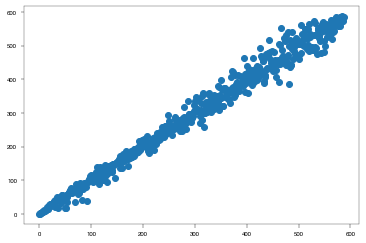

(0.9924444882293424, 0.0)
SpearmanrResult(correlation=0.9924444882293424, pvalue=0.0)


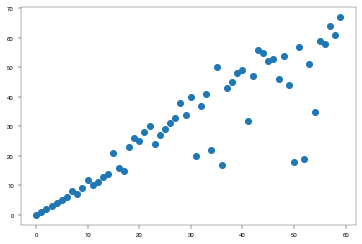

In [62]:
plt.scatter(x_rank, y_rank)
plt.show()
plt.scatter(x_rank[:60], y_rank[:60])

In [63]:
print(np.corrcoef(x_rank, y_rank)[0, 1])
print(stats.pearsonr(x_rank, y_rank))
print(stats.spearmanr(x_rank, y_rank))
print(stats.pearsonr(evids_new, evids_old))
print(stats.spearmanr(evids_new, evids_old))

0.9924444882293424
(0.9924444882293424, 0.0)
SpearmanrResult(correlation=0.9924444882293424, pvalue=0.0)
(0.9945290053651412, 0.0)
SpearmanrResult(correlation=0.9924444882293424, pvalue=0.0)
